# Изучение рынка заведений общественного питания Москвы


## Цели и задачи проекта

Проект представляет собой изучение, предобработку и анализ данных из датасетов, которые содержат инормацию о заведениях общественного питания Москвы и ценах в них.

Нашей целью является помощь инвесторам в открытии новой точки питания. Для этого проанализируем все заведения по категориям, по территориальному расположению, по сетевым или несетевым заведениям, по количеству посадочных мест, по рейтингу и по среднему чеку. Построим соответствуеющие визуализации для наглядности результата. Сделаем общие выводы и дадим свои рекомендации по открытию новой точки общественного питания в Москве


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## Описание данных

Датасет `rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `seats` — количество посадочных мест.

Датасет `rest_price.csv`содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние»;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека;
- `middle_coffee_cup` — число с оценкой одной чашки капучино.

## Загрузка данных и знакомство с ними

Загрузим исторические данные, оценим их структуру и количество, проверим на пропуски и дубликаты и при необходимости предобработаем.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные из датасетов
info_df = pd.read_csv('C:/Users/Andrey/My projects/Food Moscow/rest_info.csv')
price_df = pd.read_csv('C:/Users/Andrey/My projects/Food Moscow/rest_price.csv')

Познакомимся с данными датасета `info_df` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Данные из столбцов `category` и `district` можно привести к типу данных `category` для улучшения производительности, так как имеется ограниченное количество категорий заведений и районов Москвы. С этой же целью приведём столбец `chain` к типу `bool`, в неё содержатся только значения 0 и 1. 
- Пропуски содержатся в столбцах `hours` и `seats`, вероятно не для всех заведений владельцы предоставили информацию о режиме работы и посадочных местах. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 4 столбца и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Все типы данных в столбцах соответсвуют своим значениям.
- Пропуски присутсвуют во всех столбцах кроме `id`, не для всех заведений была найдена информация о ценах.
- Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные соответствуют описанию и выглядят корректными, но требуют предобработки перед анализом.

Объединим данные в 1 датафрейм для продолжения работы, используем метод `merge` по `id` с левым типом объединения, чтобы не потерять данные из `info_df`. При этом, возможно, какие-то данные из `price_df` будут потеряны, но этим можно пренебречь, потому что данные о ценах в отсутствии данных по другим критериям, ценности для нашего исследования не имеют.

In [7]:
# Объединяем датафреймы
df = info_df.merge(price_df, on='id', how='left')

In [8]:
# Проверяем все ли строки вошли в итоговый датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


##  Предобработка данных

### Оптимизируем типы данных

In [9]:
# Приводим столбцы category, district, chain к ранее выбранным типам данных
df['category']=df['category'].astype('category')
df['district']=df['district'].astype('category')
df['price']=df['price'].astype('category')
df['chain']=df['chain'].astype('bool')

In [10]:
# Проверям изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   bool    
 8   seats              4795 non-null   float64 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: bool(1), category(3), float64(4), object(5)
memory usage: 690.5+ KB


### Изучаем пропуски в данных

При первичном анализе мы обнаружили пропуски в столбцах `balance`, `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [11]:
# Выводим количество пропусков по столбцам
pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Процент пропусков': round((df.isnull().mean()*100),1)}).sort_values(by='Кол-во пропусков', ascending=False)

,Кол-во пропусков,Процент пропусков
middle_coffee_cup,7871,93.6
middle_avg_bill,5257,62.5
price,5091,60.6
avg_bill,4590,54.6
seats,3611,43.0
hours,536,6.4
id,0,0.0
name,0,0.0
category,0,0.0
address,0,0.0


Наименьшее число пропусков в столбце `hours`- 6%, наибольшее в `middle_coffee_cup`- 94%. В столбцах `seats`, `price`, `avg_bill`, `middle_avg_bill` примерно половина строк с пропусками. Скорее всего, такое количество пропусков связано с тем, что владельцы заведений не предоставили соответствующую информацию, а найти её в открытых источниках не удалось. А такое количество пропусков в `middle_coffee_cup` из-за того, что не везде подают кофе. Удалять строки с пропусками мы не можем, так как они содержат важную для нас информацию о категории, расположении и рейтинге заведения. Пропуски в столбце `middle_avg_bill` можно было бы заполнить средним значением взятым по группам на основе категории и района заведения, но так как пропусков слишком много, то если по группе будет мало данных, то можно серьёзно исказить значение среднего чека. Поэтому оставим пропуски без изменений и будем использовать имеющиеся данные.

Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. Посмотрим на уникальные значения в ключевых данных: категория заведения, район, категория цен.

In [12]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'district', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']
Categories (9, object): ['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', ..., 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']

Уникальные значения в столбце

Скрытых пропусков не обнаружено, переходим к поиску дубликатов.

### Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [13]:
# Выводим количество полных дубликатов
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Неявные дубликаты будем искать по столбцу `id` и по столбцам `name` и `address`, предварительно приведя их к единому регистру.

In [14]:
# Выводим количество дубликатов в столбце id
df.duplicated(subset='id').sum()

0

In [15]:
# Приводим столбцы name и address к нижнему регистру 
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()
# Выводим количество дубликатов по этим столбцам
df.duplicated(subset=['name','address']).sum()

4

Было обнаружено 4 дубликата по названию заведения и адресу, удалим их:

In [16]:
# Удаляем неявные дубликаты
df.drop_duplicates(subset=['name','address'],inplace=True)

### Создание нового столбца

Для анализа данных потребуется создать дополнительный столбец `is_24_7` с признаком круглосуточной работы. 1 - работает 24/7, 0 - не работает. Проверим какие значения в столбце `hours` могут обозначать его круглосуточную работу.

In [17]:
# Выводим первые 25 строк столбца hours
df['hours'].head(25)

0                                ежедневно, 10:00–22:00
1                                ежедневно, 10:00–22:00
2     пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...
3                                ежедневно, 09:00–22:00
4                                ежедневно, 10:00–22:00
5                                ежедневно, 10:00–23:00
6                     пн 15:00–04:00; вт-вс 15:00–05:00
7     пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...
8                                ежедневно, 10:00–22:00
9                                ежедневно, 12:00–00:00
10                             ежедневно, круглосуточно
11                               ежедневно, 10:00–21:00
12                                    вт-сб 09:00–18:00
13                               ежедневно, 08:00–22:00
14                               ежедневно, 13:00–00:00
15                    пн-пт 08:30–18:30; сб 10:00–20:00
16                               ежедневно, 10:00–23:00
17                             ежедневно, кругло

Для обозначения кргулосуточной работы используется значение `ежедневно, круглосуточно`. Добавим необходимый столбец:

In [18]:
# Добавим необходимый столбец.
df['is_24_7'] = np.where(df['hours'] == 'ежедневно, круглосуточно', True, False)

In [19]:
# Проверяем результат, выводим первые значения нового столбца.
df['is_24_7'].head(25)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20    False
21    False
22    False
23    False
24     True
Name: is_24_7, dtype: bool

### Промежуточные выводы

В результате предобработки данных были выполнены следующие действия:

- Изменены типы данных: столбцы `category` и `district` приведены к типу `category`, столбец `chain` - к `bool`;
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, они составляют значительную часть данных. Это связано с тем, что владельцы не предоставили данную информацию, и она отстутсвует в открытом доступе. Было принято решение оставить пропуски как есть, чтобы не исказить данные.
- Данные проверили на явные и неявные дубликаты - было обнаружено и удалено 4 дублирующих строки.
- Добавлен новый столбец `is_24_7`, обозначающий работает ли заведение круглосуточно.

## Исследовательский анализ данных

### Категории точек питания

Выведем все имеющиеся категории точек питания, количество заведений в этих категориях и их процентное соотношение:

In [20]:
# Выводим количество заведений по категориям
pd.DataFrame({'Кол-во заведений': df['category'].value_counts(), 
              'Процент заведений': round(((df['category'].value_counts()/df['category'].shape[0])*100),1)}).sort_values(by='Кол-во заведений', ascending=False)

,Кол-во заведений,Процент заведений
кафе,2376,28.3
ресторан,2042,24.3
кофейня,1413,16.8
"бар,паб",764,9.1
пиццерия,633,7.5
быстрое питание,603,7.2
столовая,315,3.7
булочная,256,3.0


Всего имеем 8 категорий, среди них кафе и рестораны лидируют, а столовые и булочные наименее популярны. 

Постром столбчатую диаграмму для данного распределения:

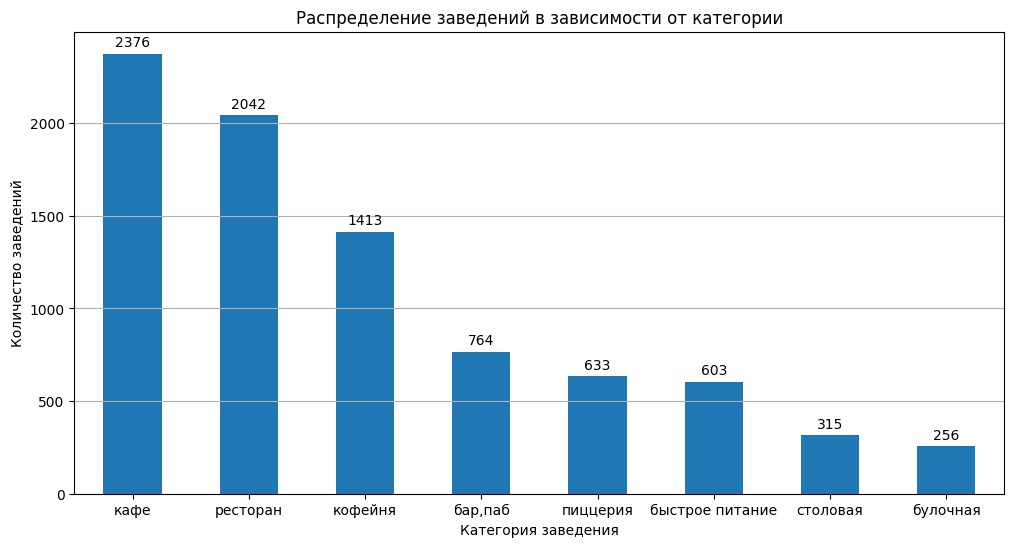

In [21]:
# Строим столбчатую диаграмму 
data = df['category'].value_counts()
data.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Добавляем подписи значений на график
for x, val in enumerate(data):
    # i — позиция по оси X, val — значение
    plt.text(x, val + max(data)*0.01, str(val), ha='center', va='bottom')

# Выводим график
plt.show()

### Расположение по районам

Выведем все имеющиеся в датафрейме административные районы Москвы, количество точек в этих районах и их процентное соотношение:

In [22]:
# Выводим количество заведений по округам
pd.DataFrame({'Кол-во заведений': df['district'].value_counts(), 
              'Процент заведений': round(((df['district'].value_counts()/df['district'].shape[0])*100),1)}).sort_values(by='Кол-во заведений', ascending=False)

,Кол-во заведений,Процент заведений
Центральный административный округ,2242,26.7
Северный административный округ,898,10.7
Южный административный округ,892,10.6
Северо-Восточный административный округ,890,10.6
Западный административный округ,850,10.1
Восточный административный округ,798,9.5
Юго-Восточный административный округ,714,8.5
Юго-Западный административный округ,709,8.4
Северо-Западный административный округ,409,4.9


Всего данные есть по 9 административным районам Москвы, в данных отсутвуют районы находящиеся за МКАДом: Зеленоградский, Новомосковский и Троицкий. С большим отрывом наибольшее количество заведений находится в Центральном районе (2242), наименьше - в Северо-Западном (409). Построим столбчатую диаграмму:

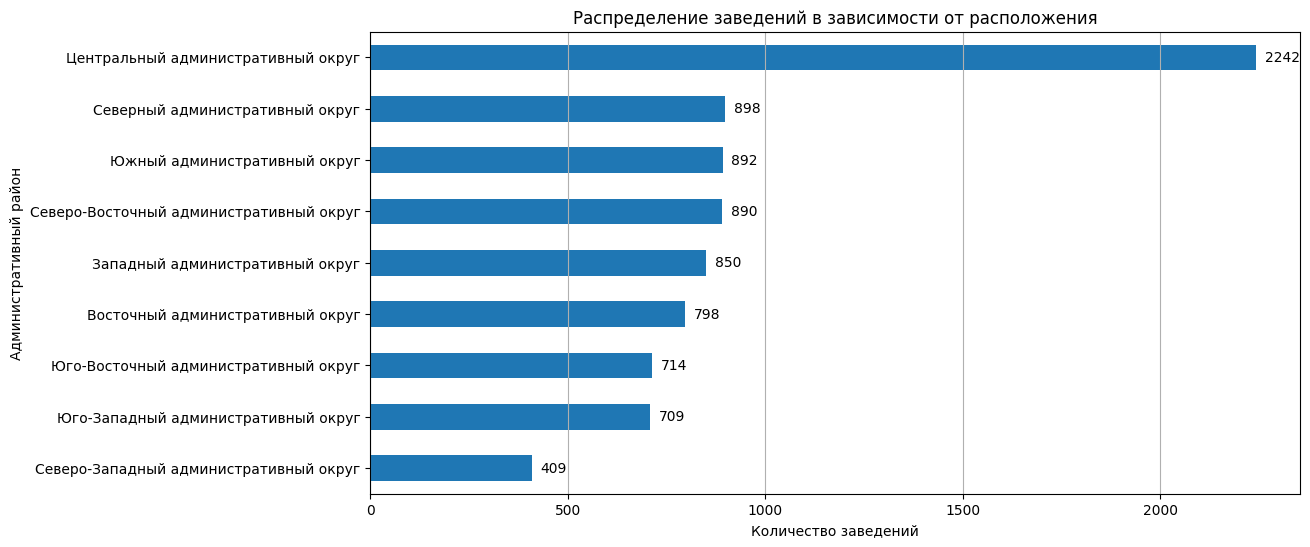

In [23]:
# Строим столбчатую диаграмму 
data = df['district'].value_counts(ascending = True)
data.plot(kind='barh', # Тип графика - горизонтальная столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Распределение заведений в зависимости от расположения'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
# Добавляем сетку графика по оси x
plt.grid(axis='x')

# Добавляем подписи значений на график
for i, (category, value) in enumerate(zip(data.index, data)):
    # На горизонтальной диаграмме x-координата — значение, y-координата — индекс
    plt.text(value + max(data)*0.01, i, str(value), va='center')

# Выводим график
plt.show()

Отдельно рассмотрим распределение заведений по категориям в Центральном районе, для этого создадим новый датафрейм:

In [24]:
# Создаём датафрейм с данными только по Центральному округу
center_df = df[df['district']=='Центральный административный округ']

Выведем категории заведений и их соотношение в Центральном районе:

In [25]:
# Выводим количество заведений по категориям
pd.DataFrame({'Кол-во заведений': center_df['category'].value_counts(), 
              'Процент заведений': round(((center_df['category'].value_counts()/center_df['category'].shape[0])*100),1)}).sort_values(by='Кол-во заведений', ascending=False)

,Кол-во заведений,Процент заведений
ресторан,670,29.9
кафе,464,20.7
кофейня,428,19.1
"бар,паб",364,16.2
пиццерия,113,5.0
быстрое питание,87,3.9
столовая,66,2.9
булочная,50,2.2


Распределение примерно такое же, как и в целом по городу, но в Центральном районе больше ресторанов чем кафе, и почти в 2 раза больше баров и пабов. Построим соответствующий график:

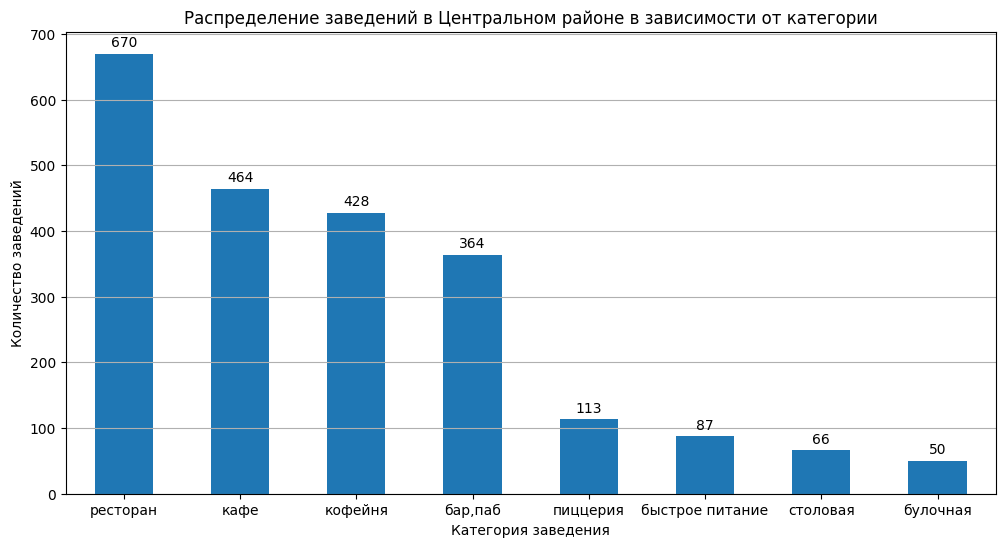

In [26]:
# Строим столбчатую диаграмму 
data = center_df['category'].value_counts()
data.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Распределение заведений в Центральном районе в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Добавляем подписи значений на график
for x, val in enumerate(data):
    # i — позиция по оси X, val — значение
    plt.text(x, val + max(data)*0.01, str(val), ha='center', va='bottom')

# Выводим график
plt.show()

### Сетевые и несетевые заведения

Изучим соотнощение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Сначала сравним их количество в целом:

In [27]:
# Выводим количество сетевых и несетевых заведений
pd.DataFrame({'Кол-во заведений': df['chain'].value_counts(), 
              'Процент заведений': round(((df['chain'].value_counts()/df['chain'].shape[0])*100),1)}).sort_values(by='Кол-во заведений', ascending=False)

,Кол-во заведений,Процент заведений
False,5199,61.9
True,3203,38.1


Несетевых заведений в городе больше. Построим график:

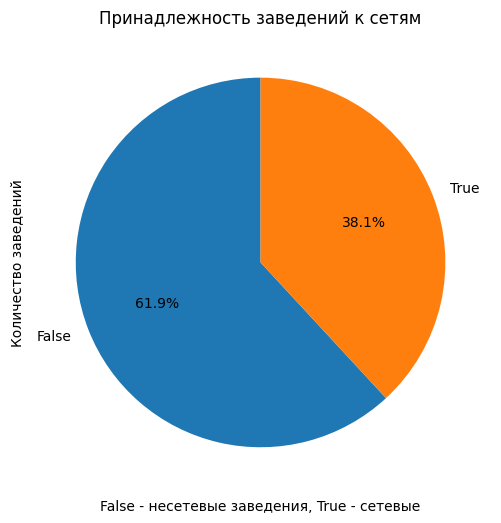

In [28]:
# Строим столбчатую диаграмму 
df['chain'].value_counts().plot(
               kind='pie', # Тип графика - круговая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(10,6), # Задаём размер
               title='Принадлежность заведений к сетям',
               autopct='%1.1f%%',
               startangle=90)
# Настраиваем оформление графика
plt.xlabel('False - несетевые заведения, True - сетевые')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()

Посмотрим на это соотношение в разрезе категорий:

In [29]:
# Выводим сводную таблицу по категориям
df.pivot_table(index='category', columns='chain', values='id', aggfunc='count')

chain,False,True
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


Бары, пабы, точки быстрого питания, кафе, рестораны и столовые чаще являются несетевыми, а булочные, кофейни и пиццерии - сетевыми. Построим столбчатую диаграмму:

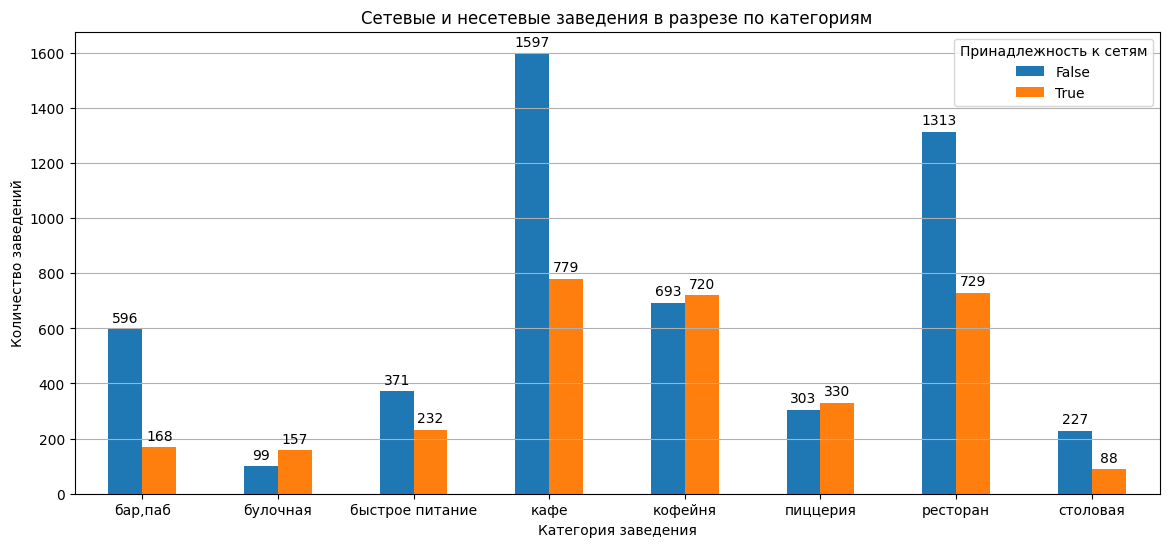

In [30]:
# Создаём новый датафрейм и обнуляем ему индексы
df_unstack = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
# Строим столбчатую диаграмму
ax = df_unstack.plot(kind='bar', figsize=(14,6))

# Настраиваем график
plt.title('Сетевые и несетевые заведения в разрезе по категориям') # Заголовок диаграммы
plt.ylabel('Количество заведений') # Подписываем ось Y
plt.xlabel('Категория заведения') # Подписываем ось X
plt.xticks(rotation=0)  # Оставляем метки оси X горизонтальными
plt.legend(title='Принадлежность к сетям')  # Легенда для разбивки по `Products`
plt.grid(axis='y')
# Добавляем подписи на график 
for p in ax.patches:
    height = p.get_height()
    # Получаем центр столбца по оси X
    x = p.get_x() + p.get_width() / 2
    # Добавляем подпись чуть выше столбца
    plt.text(x, height + max(df_unstack.max())*0.01, int(height), ha='center', va='bottom')

# Отображаем график
plt.show()

### Количество посадочных мест

Исследуем количество посадочных мест в заведениях. Сначала выведем общую статистику по столбц методом describe:

In [31]:
# Выводим общую статистику по столбцу seats
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Медианным значением посадочных мест является 75, в основном их количество находится в промежутке от 40 до 140, однако есть аномальные выбросы, посмотрим на них:

In [32]:
# Выводим первые 20 заведений с 0 посадочных мест
df[df['seats']==0].head(20)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
84,3793bd736bbb4dd08f734d53bfa57b24,meat doner kebab,булочная,"москва, улица лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,False,0.0,NaN,Средний счёт:300 ₽,300.0,NaN,True
177,3fb68f4204274347b94b5cb397fedce7,арамье,булочная,"москва, улица 800-летия москвы, 22, корп. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.0,True,0.0,NaN,NaN,NaN,NaN,False
196,bfd0d5a3a91f43e9a43f4a5fe96144f1,донер-шашлык,ресторан,"москва, улица лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,False,0.0,NaN,NaN,NaN,NaN,True
203,78f050b65d4146ef932b734db72e1e86,тандыр № 1,кафе,"москва, улица лескова, 22г",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.0,True,0.0,NaN,NaN,NaN,NaN,True
211,4636272b73bd40c59c156725492f2c05,неаполитан пицца,кафе,"москва, улица пришвина, 23",Северо-Восточный административный округ,"ежедневно, 12:00–23:00",4.3,False,0.0,NaN,NaN,NaN,NaN,False
266,88714c537ac64189b4eba7b0b93863d3,пекарня&донер,булочная,"москва, широкая улица, 21",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.1,False,0.0,NaN,NaN,NaN,NaN,True
284,3387d4ce2194417e8fff16000df3c549,центр плов,кафе,"москва, широкая улица, 16а",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.2,False,0.0,NaN,NaN,NaN,NaN,True
290,6d0bdab2dc794308b53d999bb00465aa,шаурма,кафе,"москва, осташковская улица, 7, корп. 1",Северо-Восточный административный округ,NaN,3.3,False,0.0,NaN,NaN,NaN,NaN,False
306,6453f9dbe2e84457851a9f7a4b3a267d,everest coffee,кофейня,"москва, сходненская улица, 50",Северо-Западный административный округ,"пн-чт 08:00–22:00; пт 08:00–23:00; сб,вс 09:00...",4.9,False,0.0,средние,Цена чашки капучино:200–300 ₽,NaN,250.0,False
337,5e92e36754c14b688923f9b8df3349af,пекарня маковка,пиццерия,"москва, сходненская улица, 35, корп. 1",Северо-Западный административный округ,"ежедневно, 08:00–22:00",4.9,False,0.0,NaN,NaN,NaN,NaN,False


При проверке заведений с 0 посадочных мест выясняется, что они находятся на фудкортах, поэтому не имеют собственных посадочных мест, либо это заведения, работающие только на вынос, без возможности посадки. Возможно, в некоторых случаях 0 вводился, если количество мест было неизвестно.

In [33]:
# Выводим первые 20 заведений с >1000 посадочных мест
df[df['seats']>1000].head(20)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
2713,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 11:00–06:00",4.2,False,1040.0,высокие,Средний счёт:1000–2500 ₽,1750.0,NaN,False
2722,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 10:00–22:00",4.3,True,1040.0,NaN,NaN,NaN,NaN,False
2770,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,True,1040.0,NaN,NaN,NaN,NaN,False
2966,6b611f2fc2084078952aaef40780f11c,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,NaN,4.0,False,1040.0,NaN,NaN,NaN,NaN,False
4231,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",Западный административный округ,"ежедневно, 12:00–23:00",4.2,False,1200.0,высокие,Средний счёт:2500–5000 ₽,3750.0,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,False,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,True,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,True,1288.0,NaN,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,True,1288.0,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,False,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,False


При проверке заведений с более чем 1000 посадочных мест выясняется, что часть из них находится в торговых центрах, и количество мест указано общее для всего ТЦ, а часть - это единичные заведения с 1288 мест, и тогда можно предположить, что 1288 - это максимально возможное для заполнения число в столбце.

Построим диаграмму размаха для посадочных мест:

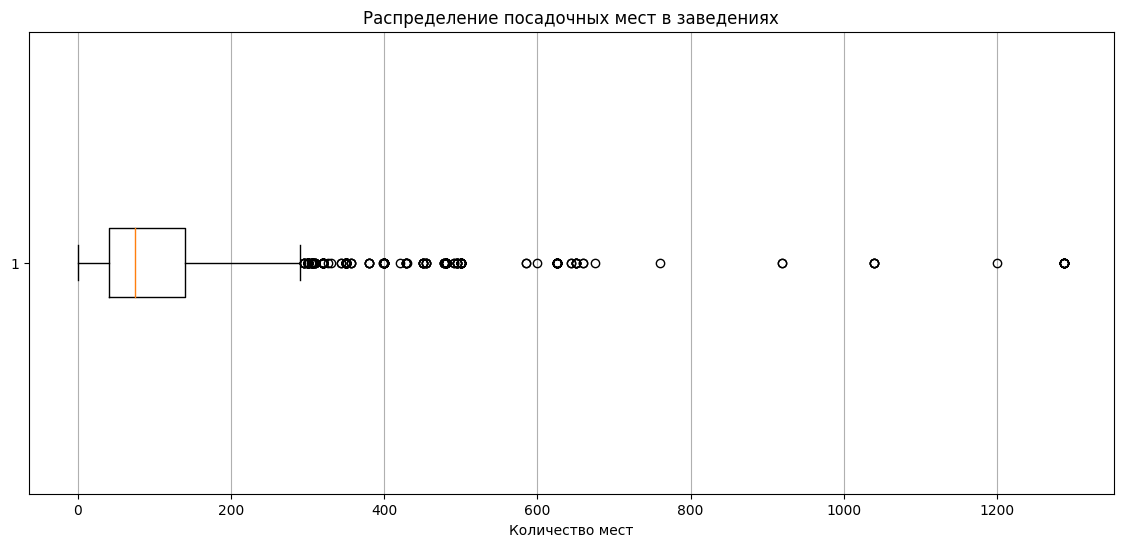

In [34]:
# Задаём размер графика
plt.figure(figsize=(14,6))
# Строим диаграмму размаха
plt.boxplot(df['seats'].dropna(),vert=False)
plt.grid(axis='x')
plt.title('Распределение посадочных мест в заведениях')
plt.xlabel('Количество мест')
# Выводим график
plt.show()

Выведем медианное значение мест для каждой категории заведений:

In [35]:
# Группируем датафрейм по категориям и медиане посадочных мест
df.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

Наибольшее количество мест соответсвует ресторанам, барам и кофейням, наименьшее - булочным и пиццериям. Построим столбчатую диаграмму для отображения:

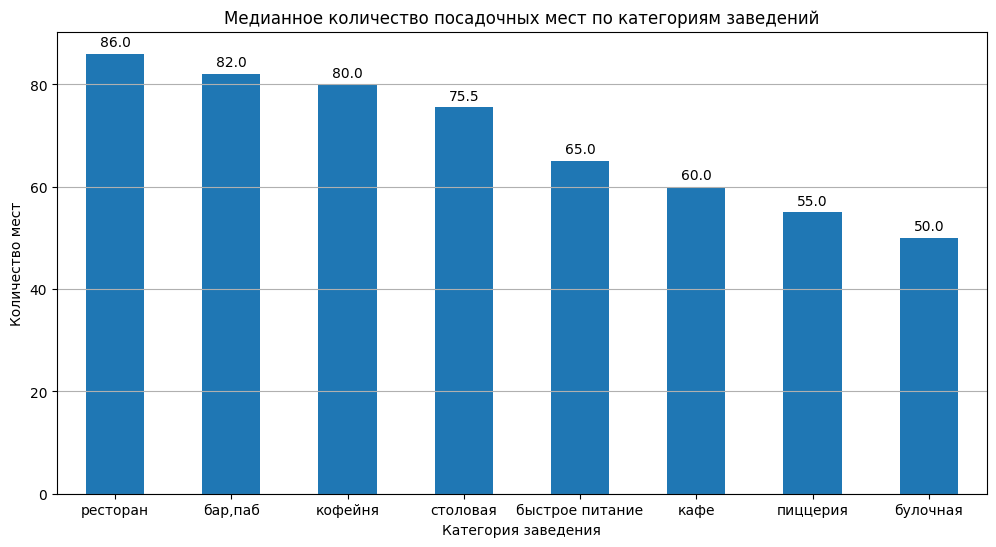

In [36]:
# Строим столбчатую диаграмму
data = df.groupby('category')['seats'].median().sort_values(ascending=False)
data.plot(kind='bar',figsize=(12,6))
plt.title('Медианное количество посадочных мест по категориям заведений') # Заголовок диаграммы
plt.ylabel('Количество мест') # Подписываем ось Y
plt.xlabel('Категория заведения') # Подписываем ось X
plt.xticks(rotation=0)  # Оставляем метки оси X горизонтальными
plt.grid(axis='y')

# Добавляем подписи значений на график
for x, val in enumerate(data):
    # i — позиция по оси X, val — значение
    plt.text(x, val + max(data)*0.01, str(val), ha='center', va='bottom')
    
plt.show()

### Рейтинг заведений

Рассмотрим средние рейтинги заведений по категориям:

In [37]:
# Группируем датафрейм по категориям и среднему рейтингу
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

Наивысшие оценки пользователей получают бары и пабы, наименьшие - точки быстрого питания, но в целом различие между всеми категориями невелико. Построим график:

### Корреляция рейтинга заведений

Проверим от чего наиболее сильно зависит рейтинг заведения, постром матрицу корреляции:

In [38]:
# Создаём корреляционную матрицу по столбцам 'category', 'rating', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7', 'price'
corr_matrix = df[['category', 'rating', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7', 'price']].phik_matrix()
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'seats', 'middle_avg_bill']


,rating
price,0.220295
middle_avg_bill,0.211868
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


У рейтинга наибольшая корреляция с категорией цен и со средним счётом  -  22% и 21% соответственно, и наименьшая с количеством посадочных мест - 0%. Построим тепловую карту:

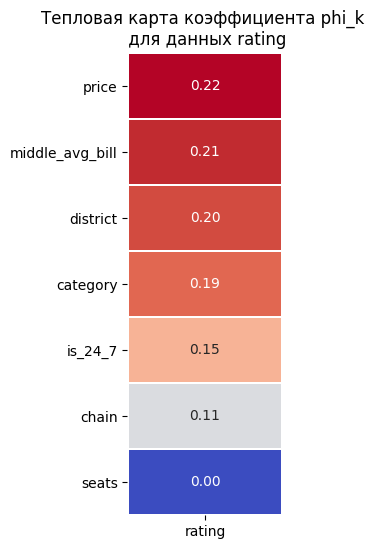

In [39]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=1, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()

Проверим взаимосвзять рейтинга со категорией цен и построим столбчатую диаграмму для этих значений:

In [40]:
df.groupby('price')['rating'].mean().sort_values(ascending=False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

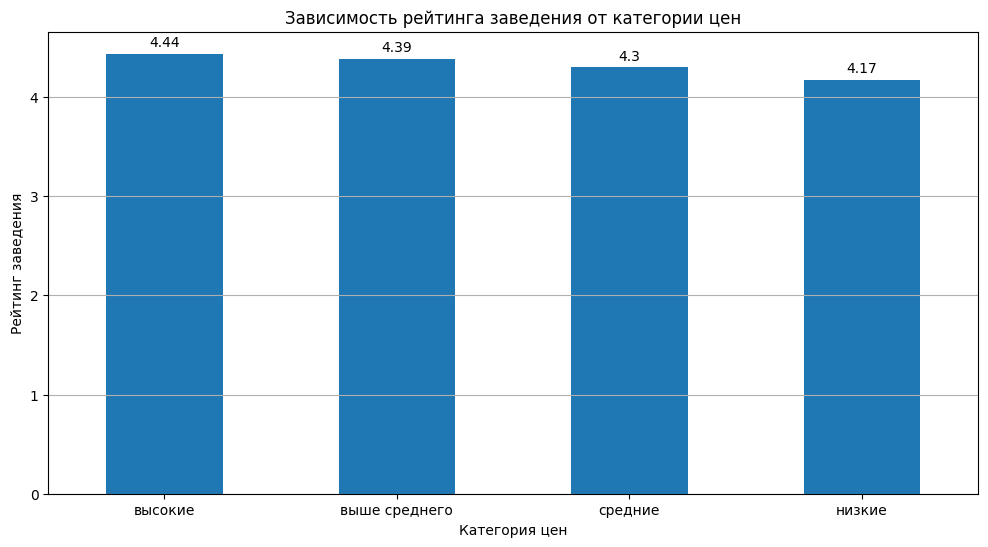

In [41]:
# Построим график столбчатой диаграммы
data = df.groupby('price')['rating'].mean().sort_values(ascending=False)
data.plot(kind='bar',
               title='Зависимость рейтинга заведения от категории цен',
               legend=False,
               ylabel='Рейтинг заведения',
               xlabel='Категория цен',
               rot=0,
               figsize=(12, 6))
plt.grid(axis='y')

# Добавляем подписи значений на график
for x, val in enumerate(data):
    # i — позиция по оси X, val — значение
    plt.text(x, val + max(data)*0.01, str(round(val,2)), ha='center', va='bottom')

# Выводим график
plt.show()

Чем выше категория цен в заведении, тем выше его рейтинг, но в целом все категории имеют высокий рейтинг. Можно сделать вывод, что высокие цены не отпугивают посетителей.

Проверим взаимосвзять рейтинга со средним чеком, для этого построим диаграмму рассеяния для этих значений:

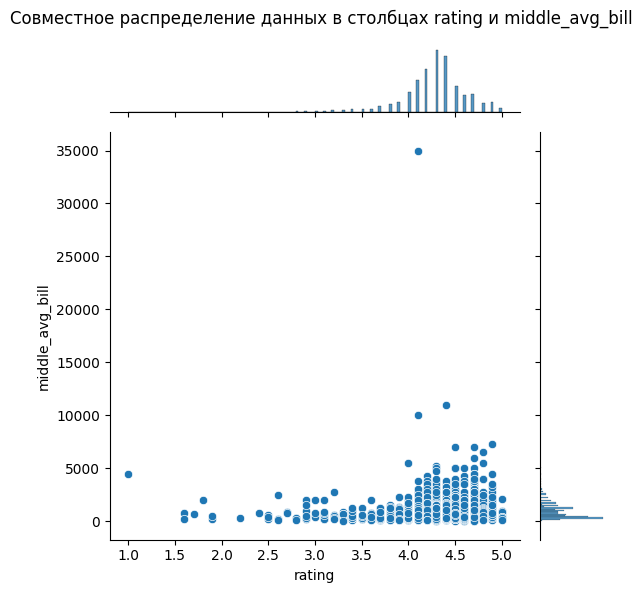

In [42]:
# Строим диаграмму рассеяния рейтинга и среднего чека
sns.jointplot(data=df, x='rating', y='middle_avg_bill', height=6)

# Подписываем и отображаем график
plt.suptitle('Совместное распределение данных в столбцах rating и middle_avg_bill')
plt.tight_layout()
plt.show()

Из-за выбросов по высокому среднему чеку график получается слишком растянутым, создадим новый датафрейм для значений чека ниже 5000 и построим график для него:

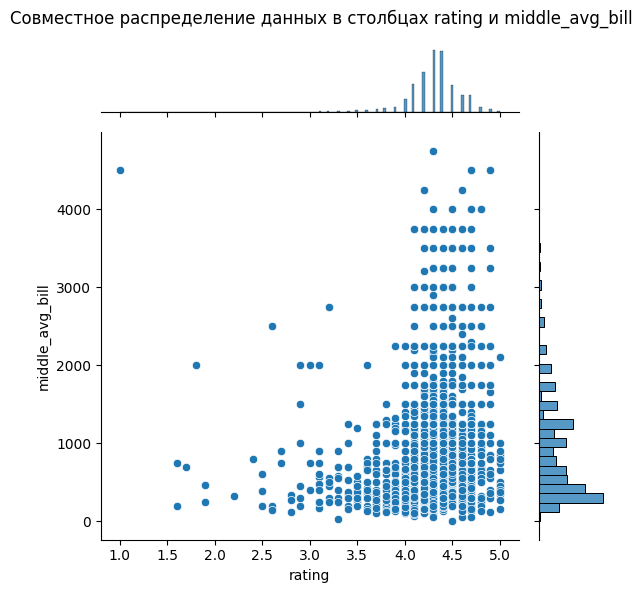

In [43]:
# Создаём датафрейм для значений среднего чека <5000
df_under5k= df[df['middle_avg_bill']<5000]
# Строим диаграмму рассеяния рейтинга и среднего чека
sns.jointplot(data=df_under5k, x='rating', y='middle_avg_bill', height=6)

# Подписываем и отображаем график
plt.suptitle('Совместное распределение данных в столбцах rating и middle_avg_bill')
plt.tight_layout()
plt.show()

Исходя из графика можно сказать, что в столбце `rating` большинство значений сосредоточено в диапазоне от 4.0 до 4.7, а в столбце `middle_avg_bill` - в диапазоне от 200 до 2000 рублей. Корреляция между значениями очень слабая: с увеличением чека, становится меньше низких оценок, но из-за малого количества данных с высоким чеком, такой вывод может быть ложным.

### Топ-15 популярных сетей в Москве

Выведем топ-15 сетей по количеству заведений и их средний рейтинг:

In [44]:
# Создаём датафрейм, в котором оставляем только сетевые заведения
chain_df = df[df['chain']==True]
# Создаём сводную таблицу с группировкой по количеству заведений и среднему рейтингу
df_top15 = pd.pivot_table(chain_df,index=['name','category'] ,values=['chain','rating'],aggfunc={'chain':'count','rating':'mean'})
# Сортируем по убыванию и выводим 15 первых строк
df_top15.sort_values(by='chain',ascending=False).head(15)

,,chain,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


- Топ-3 сетей по количеству заведений:
    - Шоколадница - 119 точек
    - Домино'с пицца - 76 точек
    - Додо пицца - 74 точек
- Топ-3 категорий:
    - Кофейня - 6 сетей
    - Ресторан - 3 сети
    - Кафе - 3 сети
- Топ-3 сетей по рейтингу:
    - Кофемания - 4.46
    - Буханка - 4.41
    - Кулинарная лавка братьев караваевых - 4.39

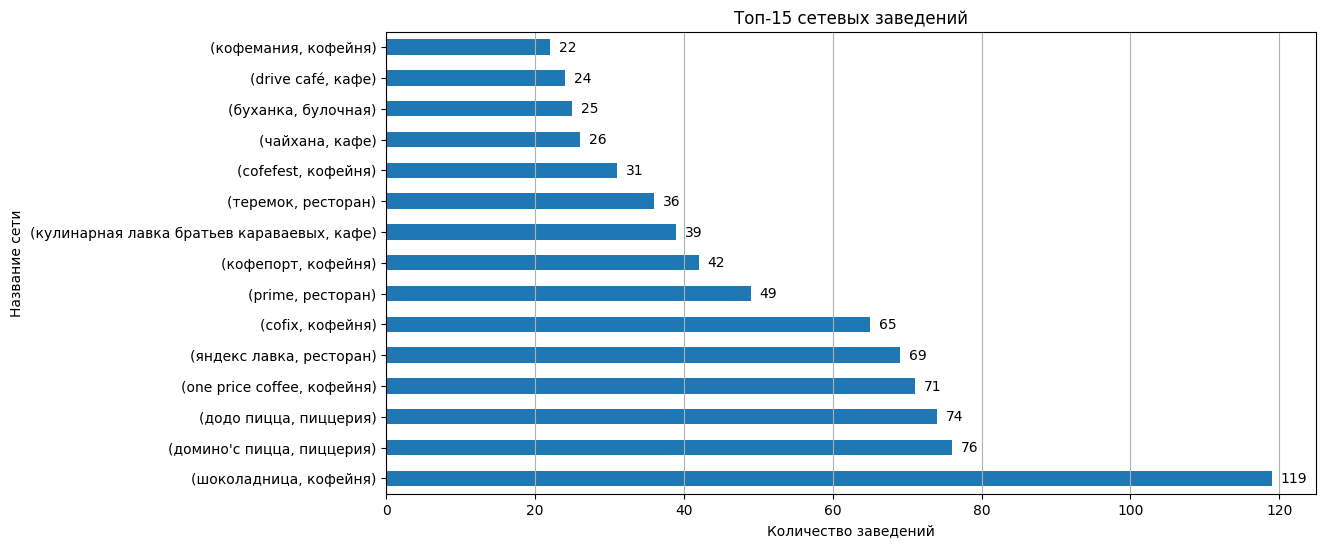

In [45]:
# Строим столбчатую диаграмму
data = df_top15['chain'].sort_values(ascending=False).head(15)
data.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Топ-15 сетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
# Добавляем сетку графика по оси x
plt.grid(axis='x')

# Добавляем подписи значений на график
for i, (category, value) in enumerate(zip(data.index, data)):
    # На горизонтальной диаграмме x-координата — значение, y-координата — индекс
    plt.text(value + max(data)*0.01, i, str(value), va='center')
    
# Выводим график
plt.show()


### Зависимость среднего чека от района

Рассмотрим медиану среднего чека по административным районам:

In [46]:
df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

Наивысшая медиана в Центральном и Западном округах - 1000 рублей, наименьшая в Юго-Восточном - 450 рублей. Построим столбчатую диаграмму:

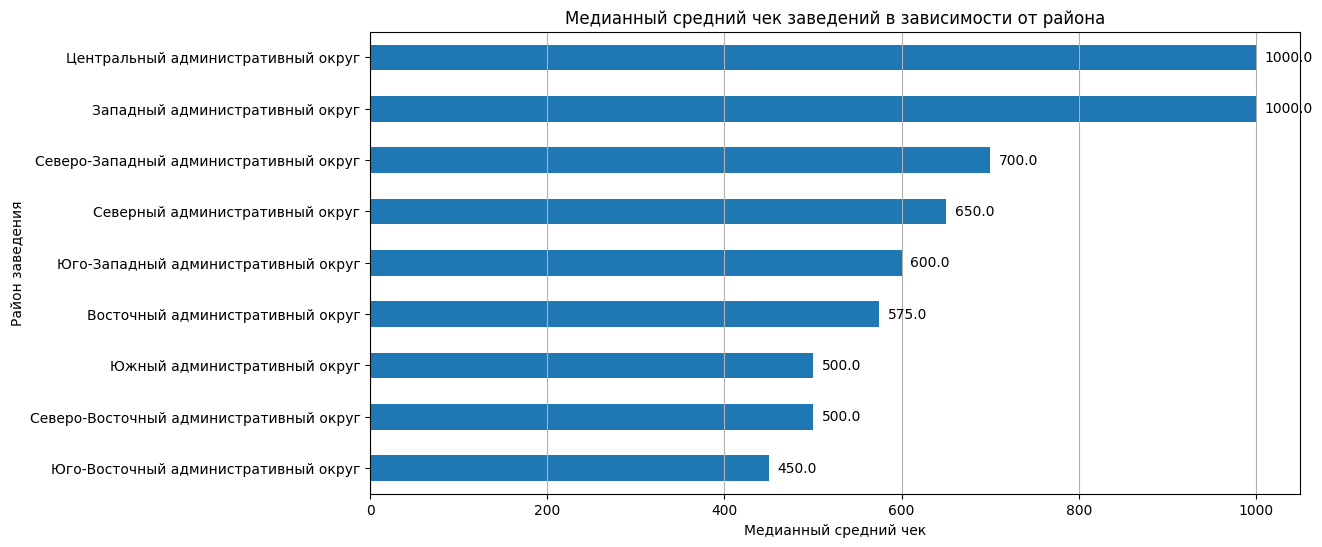

In [47]:
# Строим столбчатую диаграмму
data = df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=True)
data.plot(
               kind='barh', # Тип графика - горизонтальная столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Медианный средний чек заведений в зависимости от района'
)

# Настраиваем оформление графика
plt.xlabel('Медианный средний чек')
plt.ylabel('Район заведения')
# Добавляем сетку графика по оси x
plt.grid(axis='x')

# Добавляем подписи значений на график
for i, (category, value) in enumerate(zip(data.index, data)):
    # На горизонтальной диаграмме x-координата — значение, y-координата — индекс
    plt.text(value + max(data)*0.01, i, str(value), va='center')
    
# Выводим график
plt.show()

Отдельно рассмотрим, что влияет на размер чека на примере Центрального округа. Построим матрицу корреляции и тепловую карту:

In [48]:
corr_matrix_center = center_df[['category', 'rating', 'chain', 'seats', 'middle_avg_bill', 'is_24_7']].phik_matrix()
corr_matrix_center.loc[corr_matrix_center.index !='middle_avg_bill'][['middle_avg_bill']].sort_values(by='middle_avg_bill', ascending=False)

interval columns not set, guessing: ['rating', 'seats', 'middle_avg_bill']


,middle_avg_bill
category,0.400528
chain,0.303893
rating,0.290299
seats,0.135854
is_24_7,0.000000


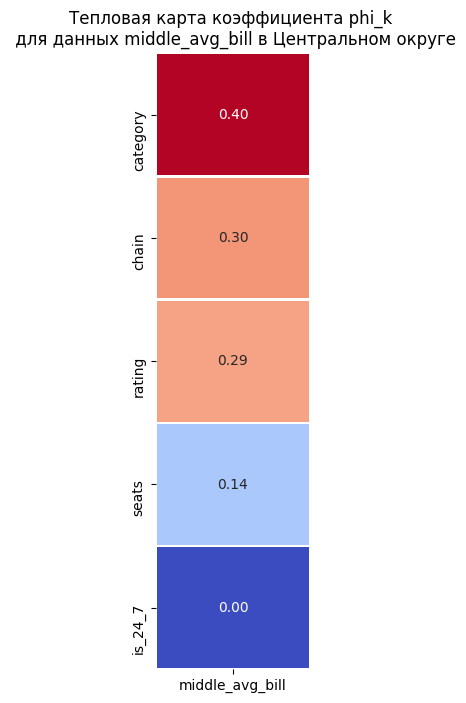

In [49]:
# Строим тепловую карту
plt.figure(figsize=(2, 8))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap_center = corr_matrix_center.loc[corr_matrix_center.index !='middle_avg_bill'][['middle_avg_bill']].sort_values(by='middle_avg_bill', ascending=False)
sns.heatmap(data_heatmap_center,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=1, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных middle_avg_bill в Центральном округе')

# Выводим график
plt.show()

Сильнее всего медианный средник чек коррелирует с категорией заведения, проверим взаимосвязь:

In [50]:
# Группируем датафрейм по категориям и медиане среднего чека
df.groupby('category')['middle_avg_bill'].median().sort_values(ascending=False)

category
бар,паб            1250.0
ресторан           1250.0
пиццерия            600.0
кафе                550.0
булочная            450.0
кофейня             400.0
быстрое питание     375.0
столовая            300.0
Name: middle_avg_bill, dtype: float64

В барах и ресторанах самый высокий медианный средник чек - 1250 рублей, в столовых самый низкий - 300 рублей. Построим график:

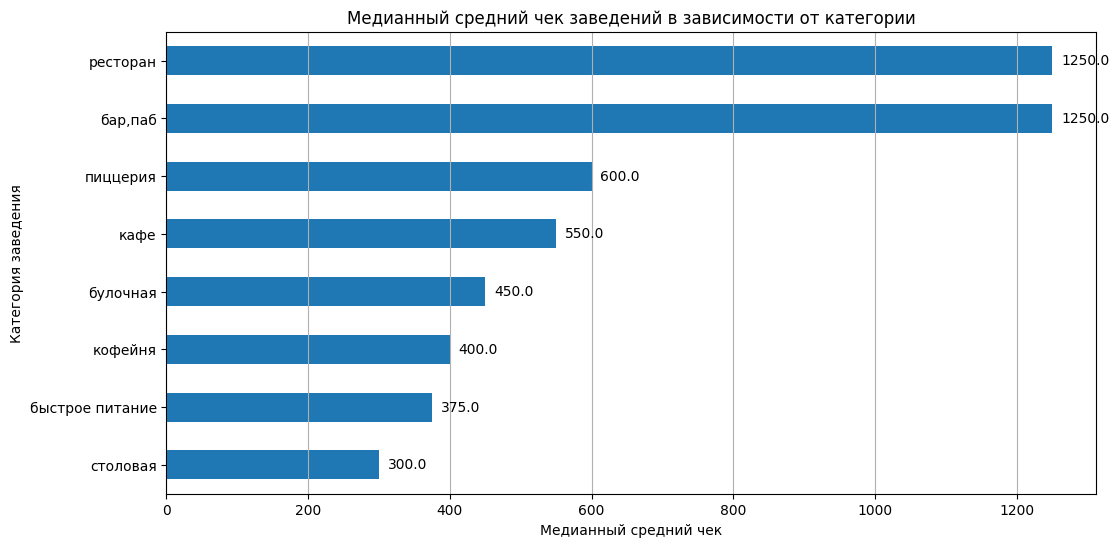

In [51]:
# Строим столбчатую диаграмму
data = df.groupby('category')['middle_avg_bill'].median().sort_values(ascending=True)
data.plot(
               kind='barh', # Тип графика - горизонтальная столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(12,6), # Задаём размер
               title='Медианный средний чек заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Медианный средний чек')
plt.ylabel('Категория заведения')
# Добавляем сетку графика по оси x
plt.grid(axis='x')

# Добавляем подписи значений на график
for i, (category, value) in enumerate(zip(data.index, data)):
    # На горизонтальной диаграмме x-координата — значение, y-координата — индекс
    plt.text(value + max(data)*0.01, i, str(value), va='center')
    
# Выводим график
plt.show()

### Промежуточные выводы

- Всего в данных представлено 8 категорий точек питания: 
    - кафе              - 28% от всех заведений
    - ресторан          - 24%
    - кофейня           - 17%
    - бар, паб          - 9%
    - пиццерия          - 8%
    - быстрое питание   - 7%
    - столовая          - 4%
    - булочная          - 3%


- Заведения расположены в 9 административных районах Москвы:
    - Центральный административный округ        - 27% от всех заведений
    - Северный административный округ           - 11%
    - Южный административный округ              - 11%
    - Северо-Восточный административный округ   - 11%
    - Западный административный округ           - 10%
    - Восточный административный округ          - 9%
    - Юго-Восточный административный округ      - 8%
    - Юго-Западный административный округ       - 8%
    - Северо-Западный административный округ    - 5%
- В Центральном округе, в отличие от данных в целом по городу, ресторанов больше чем кафе, и количество баров в 2 раза больше.

- Из них:
    - 62% являются несетевыми
    - 38% - сетевыми

- Количество посадочных в основном варьируется от 40 до 140, медиана по категориям заведений:
    - ресторан          - 86
    - бар,паб           - 82
    - кофейня           - 80
    - столовая          - 75
    - быстрое питание   - 65
    - кафе              - 60
    - пиццерия          - 55
    - булочная          - 50

- Рейтинг заведения практически не зависит от его категории, для всех категорий средний рейтинг варьируется от 4.05 до 4.38. С остальными показателями рейтинг тоже очень слабо коррелирует.

- Топ-3 сетей по количеству заведений:
    - Шоколадница - 119 точек
    - Домино'с пицца - 76 точек
    - Додо пицца - 74 точек
- Топ-3 категорий:
    - Кофейня - 6 сетей
    - Ресторан - 3 сети
    - Кафе - 3 сети
- Топ-3 сетей по рейтингу:
    - Кофемания - 4.46
    - Буханка - 4.41
    - Кулинарная лавка братьев караваевых - 4.39

- Медиана среднего чека по районам:
    - Западный административный округ           - 1000
    - Центральный административный округ        - 1000
    - Северо-Западный административный округ    -  700
    - Северный административный округ           -  650
    - Юго-Западный административный округ       -  600
    - Восточный административный округ          -  575
    - Северо-Восточный административный округ   -  500
    - Южный административный округ              -  500
    - Юго-Восточный административный округ      -  450

- Более всего медиана среднего чека коррелирует с категорией заведения: наивысшие средние чеки имеют рестораны и бары, они более чем в 2 раза выше чем в остальных категориях

## Итоговые выводы

### Общий обзор
В ходе исследования проанализировали данные по 8406 точкам общественного питания города Москвы по данным на лето 2022 года. Данные включали в себя информацию о заведениях и ценах в них. Акцент исследования был сделан на изучении основных показателей существующих заведений и корреляции рейтинга и среднего чека с этими показателями. Среди них: категория, расположение, принадлежность к сетям, количество посадочных мест.

### Ответы на исследовательские вопросы 
- Среди заведений преобладают кафе и рестораны, они занимают 28% и 24% рынка соответсвенно. 
- Более четверти всех заведений находится в Центральном административном районе, в остальных районах 10% и менее.
- Сетевых заведений 62%, несетевых - 38%. Самые популярные сети - кофейни, пиццерии и рестораны.
- Количество посадочных в основном варьируется от 40 до 140.
- Рейтинг заведения практически не зависит от его категории. С остальными показателями рейтинг тоже очень слабо коррелирует.
- Больше всего средний чек зависит от категории, в ресторанах и барах он составляет 1250 рублей, что значительно выше чем в остальных.

### Рекомендации на основе анализа данных
Наиболее интересной нишей для новой точки общественного питания является открытие бара в Западном административном округе.
- Бары имеют самый высокий средний рейтинг (4.39) среди всех категорий.
- Среди баров нет крупных сетей с которыми придётся конкурировать. 
- В барах вместе с ресторанами самый высокий средний чек - 1250 рублей.
- В Западном округе средний чек такой же как и в Центральном - 1000 рублей, но количество заведений значительно ниже - 850 в Западном и 2242 в Центральном.
